In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt 
import numpy as np 

In [82]:
class MLworkflow(object):
    def __init__(self):
        self._performance = {}
        self._predictions = {}
        self.data = pd.read_csv("insurance.csv")
    

    def eda(self, feature, target, histogram, line_chart):
        self.corr = self.data[feature].corr(self.data[target])
        if histogram:
            self.data[feature].hist()
            plt.show()
        if line_chart:
            plt.scatter(self.data[feature], self.data[target])
            plt.show()

            
    def data_prep(self, features, target, transform):
        for feature in features:
            if transform:
                self.data[feature] = np.log(self.data[feature])
        self.X = self.data[features]
        self.y = self.data[target]
        
        
    def fit(self, model_name, split):
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, random_state=42, test_size=split)
        self.X_test = X_test
        self.y_test = y_test
        if model_name == 'lr':
            self.model = LinearRegression()
            self.model.fit(X_train, y_train)
        elif model_name == 'rf':
            self.model = RandomForestRegressor(random_state=42)
            self.model.fit(X_train, y_train)

    def predict(self, model_name):
        self._predictions[model_name] = self.model.predict(self.X_test)

    def validate(self, model_name):
        self._performance[model_name] = mean_absolute_error(self._predictions[model_name], self.y_test)
        

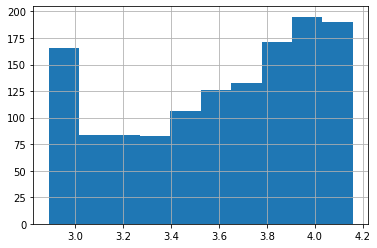

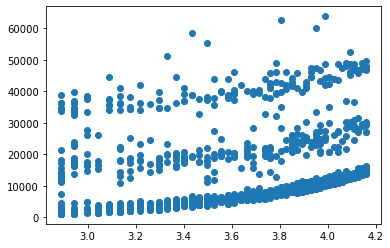

0.2899670885173301


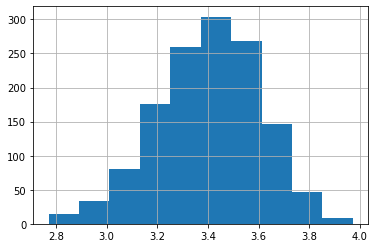

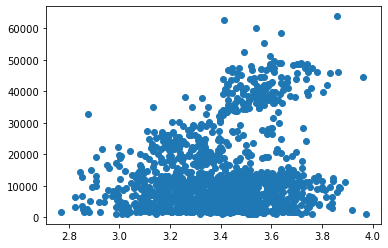

0.19926573286442


In [83]:
mlworkflow = MLworkflow()
mlworkflow.eda('age', 'charges', True, True)
print(mlworkflow.corr)
mlworkflow.eda('bmi', 'charges', True, True)
print(mlworkflow.corr)

In [85]:
model = MLworkflow()
features = ['bmi', 'age']
model.data_prep(features, 'charges', True)
model.fit('lr', 0.2)
model.predict('lr')
model.validate('lr')
model.fit('rf', 0.2)
model.predict('rf')
model.validate('rf')
print(model._performance)

{'lr': 9232.30798499716, 'rf': 9161.66313279731}


In [157]:
class MLworkflowExtended(object):
    def __init__(self):
        self._performance = {}
        self._predictions = {}
        self._models = {}
        self.data = pd.read_csv("insurance.csv")
   

    def eda(self, feature, target, histogram, line_chart):
        self.corr = self.data[feature].corr(self.data[target])
        if histogram:
            self.data[feature].hist()
            plt.show()
        if line_chart:
            plt.scatter(self.data[feature], self.data[target])
            plt.show()

            
    def data_prep(self, features, target, transform):
        self.target = target
        for feature in features:
            if transform:
                self.data[feature] = np.log(self.data[feature])

        
        
    def fit(self, model_name, model_category, category_value, split, n_estimators=10, max_depth=10):
        self.split = split
        self.model_category = model_category
        self.category_value = category_value
        if category_value not in self._predictions:
            self._predictions[category_value]= {}
        if category_value not in self._performance:
            self._performance[category_value] = {}
        if category_value not in self._models:
            self._models[category_value] = {}
            
        self.data_cat = self.data[self.data[model_category] == category_value]
        
        self.X = self.data_cat[features]
        self.y = self.data_cat[self.target]
        
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, random_state=42, test_size=split)
        self.X_test = X_test
        self.y_test = y_test
        
        if model_name == 'lr':
            self.model = LinearRegression()
            self.model.fit(X_train, y_train)
        elif model_name == 'rf':
            self.model = RandomForestRegressor(n_estimators=n_estimators, max_depth = max_depth, random_state=42)
            self.model.fit(X_train, y_train)
        self._models[category_value] = self.model
        
        
    def predict(self, model_name):
        self._predictions[self.category_value][model_name] = self._models[self.category_value].predict(self.X_test)

    def validate(self, model_name):
        self._performance[self.category_value][model_name] = mean_absolute_error(self._predictions[self.category_value][model_name], self.y_test)
        

In [161]:
model = MLworkflowExtended()
features = ['bmi', 'age']
model.data_prep(features, 'charges', True)

model.fit('lr', 'sex', 'female',  0.2)
model.predict('lr')
model.validate('lr')
print(model._performance)

model.fit('rf', 'sex', 'female',  0.2)
model.predict('rf')
model.validate('rf')
print(model._performance)


model.fit('rf','sex', 'male', 0.2, 100, 100)
model.predict('rf')
model.validate('rf')
print(model._performance)

model.fit('lr','sex', 'male', 0.2)
model.predict('lr')
model.validate('lr')
print(model._performance)


{'female': {'lr': 8016.511847126877}}
{'female': {'lr': 8016.511847126877, 'rf': 8626.57969374399}}
{'female': {'lr': 8016.511847126877, 'rf': 8626.57969374399}, 'male': {'rf': 10547.991737227838}}
{'female': {'lr': 8016.511847126877, 'rf': 8626.57969374399}, 'male': {'rf': 10547.991737227838, 'lr': 9604.81470061645}}


In [162]:
model = MLworkflowExtended()
features = ['bmi', 'age']
model.data_prep(features, 'charges', True)

model.fit('lr', 'region', 'southwest',  0.2)
model.predict('lr')
model.validate('lr')
print(model._performance)

model.fit('rf', 'region', 'southwest',  0.2)
model.predict('rf')
model.validate('rf')
print(model._performance)


model.fit('rf','region', 'northwest', 0.2, 100, 100)
model.predict('rf')
model.validate('rf')
print(model._performance)

model.fit('lr','region', 'northwest', 0.2)
model.predict('lr')
model.validate('lr')
print(model._performance)

{'southwest': {'lr': 8899.213068898414}}
{'southwest': {'lr': 8899.213068898414, 'rf': 8600.643187882553}}
{'southwest': {'lr': 8899.213068898414, 'rf': 8600.643187882553}, 'northwest': {'rf': 7070.996465990001}}
{'southwest': {'lr': 8899.213068898414, 'rf': 8600.643187882553}, 'northwest': {'rf': 7070.996465990001, 'lr': 7481.114681045738}}


In [173]:
class EDA(object):
    def __init__(self):
        self.data = pd.read_csv("insurance.csv")

    def eda(self, feature, target, histogram, line_chart):
        self.target = target
        self.corr = self.data[feature].corr(self.data[target])
        if histogram:
            self.data[feature].hist()
            plt.show()
        if line_chart:
            plt.scatter(self.data[feature], self.data[target])
            plt.show()

In [247]:
class FeatureEngineering(object):
    def __init__(self):
        eda = EDA()
        self.data = eda.data
        
    def engineer(self, features, target, transform, display):
        self.target = target
        for feature in features:
            if transform and display:
                print(f"{feature}/{target} correlation Before log-tranform:", self.data[feature].corr(self.data[self.target]))
                self.data[feature] = np.log(self.data[feature])
                print(f"{feature}/{target} correlation After log-tranform:", self.data[feature].corr(self.data[self.target]))

In [248]:
class DataPrep(object):
    def __init__(self):
        self._performance = {}
        self._predictions = {}
        self._models = {}
        feature_engineering = FeatureEngineering()
        feature_engineering.engineer(['bmi', 'age'], 'charges', True, False)
        self.data = feature_engineering.data
        self.target = feature_engineering.target
         
    def dataprep(self, model_name, model_category, category_value, split):
        self.split = split
        self.model_category = model_category
        self.category_value = category_value
        if category_value not in self._predictions:
            self._predictions[category_value]= {}
        if category_value not in self._performance:
            self._performance[category_value] = {}
        if category_value not in self._models:
            self._models[category_value] = {}
            
        self.data_cat = self.data[self.data[model_category] == category_value]
        
        self.X = self.data_cat[features]
        self.y = self.data_cat[self.target]
        
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, random_state=42, test_size=split)
        self.X_test = X_test
        self.y_test = y_test
        self.X_train = X_train
        self.y_train = y_train        

In [266]:
class ModelTraining(object):
    def __init__(self, dataprep):
        self._models = dataprep._models
        self._predictions = dataprep._predictions
        self._performance = dataprep._performance

    def get_data(self, training_data, category_value):
        self.X_train, self.X_test, self.y_train, self.y_test = training_data
        self.category_value = category_value
        
    def fit(self, model_name, n_estimators=10, max_depth=10):
        if model_name == 'lr':
            self.model = LinearRegression()
            self.model.fit(self.X_train, self.y_train)
        elif model_name == 'rf':
            self.model = RandomForestRegressor(n_estimators=n_estimators, max_depth = max_depth, random_state=42)
            self.model.fit(self.X_train, self.y_train)
        self._models[self.category_value] = self.model
        
    def predict(self, model_name):
        self._predictions[self.category_value][model_name] = self._models[self.category_value].predict(self.X_test)

    def validate(self, model_name):
        self._performance[self.category_value][model_name] = mean_absolute_error(self._predictions[self.category_value][model_name], self.y_test)
            

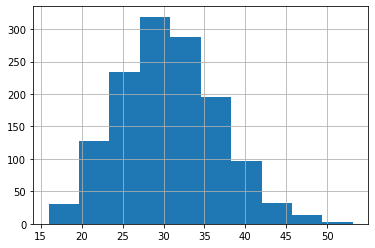

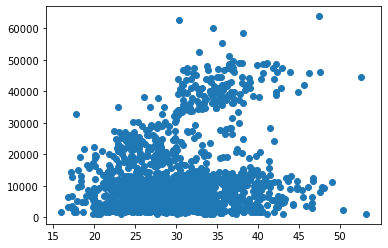

In [267]:
eda = EDA()
eda.eda('bmi', 'charges', True, True)

In [268]:
feature_engineering = FeatureEngineering()
feature_engineering.engineer(['bmi', 'age'], 'charges', True, True )

bmi/charges correlation Before log-tranform: 0.19834096883362895
bmi/charges correlation After log-tranform: 0.19926573286442
age/charges correlation Before log-tranform: 0.29900819333064754
age/charges correlation After log-tranform: 0.2899670885173301


In [269]:
dataprep = DataPrep()
dataprep.dataprep('rf', 'sex', 'female', 0.2)
training_data = dataprep.X_train, dataprep.X_test, dataprep.y_train, dataprep.y_test
category_value = dataprep.category_value

modeltraining = ModelTraining(dataprep)
modeltraining.get_data(training_data, category_value)
modeltraining.fit('rf', 200, 200)
modeltraining.predict('rf')
modeltraining.validate('rf')
print(modeltraining._performance)



{'female': {'rf': 8466.305049427323}}


In [270]:
dataprep.dataprep('lr', 'sex', 'female', 0.2)
training_data = dataprep.X_train, dataprep.X_test, dataprep.y_train, dataprep.y_test
category_value = dataprep.category_value

modeltraining = ModelTraining(dataprep)
modeltraining.get_data(training_data, category_value)
modeltraining.fit('lr')
modeltraining.predict('lr')
modeltraining.validate('lr')
print(modeltraining._performance)

{'female': {'rf': 8466.305049427323, 'lr': 8034.741428854192}}


In [271]:
dataprep.dataprep('lr', 'sex', 'male', 0.2)
training_data = dataprep.X_train, dataprep.X_test, dataprep.y_train, dataprep.y_test
category_value = dataprep.category_value

modeltraining = ModelTraining(dataprep)
modeltraining.get_data(training_data, category_value)
modeltraining.fit('lr')
modeltraining.predict('lr')
modeltraining.validate('lr')
print(modeltraining._performance)

{'female': {'rf': 8466.305049427323, 'lr': 8034.741428854192}, 'male': {'lr': 9583.028554450382}}


In [272]:
dataprep.dataprep('rf', 'sex', 'male', 0.2)
training_data = dataprep.X_train, dataprep.X_test, dataprep.y_train, dataprep.y_test
category_value = dataprep.category_value

modeltraining = ModelTraining(dataprep)
modeltraining.get_data(training_data, category_value)
modeltraining.fit('rf', 200, 200)
modeltraining.predict('rf')
modeltraining.validate('rf')
print(modeltraining._performance)

{'female': {'rf': 8466.305049427323, 'lr': 8034.741428854192}, 'male': {'lr': 9583.028554450382, 'rf': 10609.717391992232}}
